In [310]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [311]:
%autoreload
from tqdm.notebook import tqdm
import numpy as np
from diff3d import DLA_diff3d
from diff2d import DLA_diff2d

from collections import Counter
import itertools
import matplotlib.pyplot as plt

In [312]:
def generate_tree(PS):
    x, y, z = [40, 80, 40]
    eta = 1
    dla = DLA_diff2d(seed=[x//2, y - 1], x = x, y = y, eta=eta, w = 1, PS = PS)

    while not dla.converged:
        dla.update()

    for t in tqdm(range(150)):
        dla.growth(t + 1)

        while not dla.converged:
            dla.update()
    return dla

In [313]:
simulations = 20
PSs = [10, 20, 30, 40, 50]

generated_trees = dict()


In [314]:
for PS in PSs:
    generated_trees[PS] = []

for PS in PSs:
    for _ in range(simulations):
        generated_trees[PS].append(generate_tree(PS))
        
generated_trees

{10: [<diff2d.DLA_diff2d at 0x7ff85824bf60>,
 20: [<diff2d.DLA_diff2d at 0x7ff856159fd0>,
 30: [<diff2d.DLA_diff2d at 0x7ff859a3a6d8>,
 40: [<diff2d.DLA_diff2d at 0x7ff859152cc0>,
 50: [<diff2d.DLA_diff2d at 0x7ff858ed6550>,
  <diff2d.DLA_diff2d at 0x7ff8591ff4e0>]}

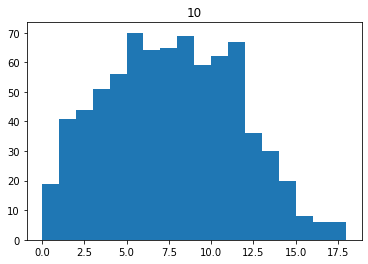

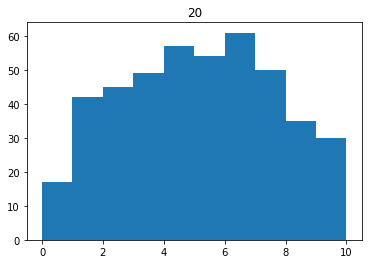

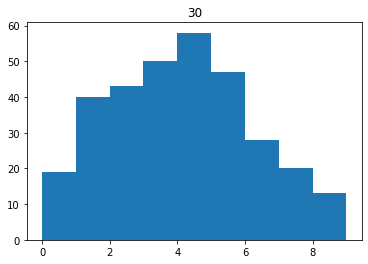

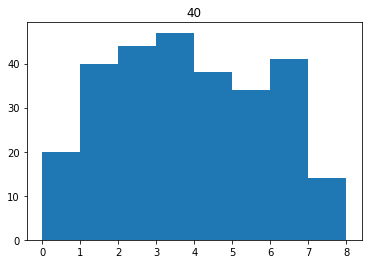

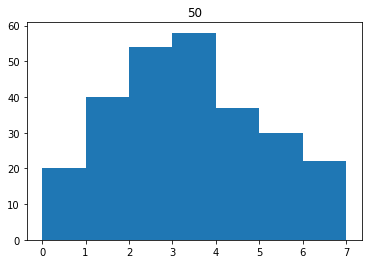

In [315]:
for PS in PSs:
    plt.figure()
    branch_orders = []
    for tree in generated_trees[PS]:
        branch_orders += tree.tree.get_branch_orders()
    plt.hist(branch_orders, bins = max(branch_orders))
    plt.title("{}".format(PS))

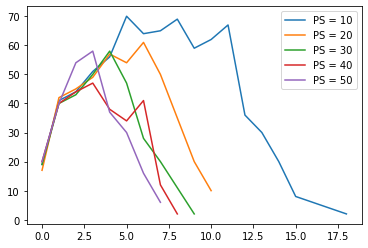

In [316]:
plt.figure()
for PS in PSs:

    branch_orders = []
    for tree in generated_trees[PS]:
        branch_orders += tree.tree.get_branch_orders()
    
    
    c = Counter(branch_orders)
    c = sorted(c.items())
    x, y = zip(*c)
    plt.plot(x, y, label='PS = {}'.format(PS))
    
plt.legend()
plt.show()

(array([20., 40., 54., 58., 37., 30., 22.]),
 array([0., 1., 2., 3., 4., 5., 6., 7.]),
 <a list of 7 Patch objects>)

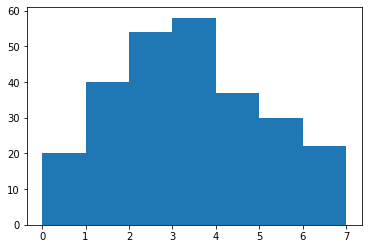

In [317]:
# c = Counter(branch_orders)

# print(c.items())
plt.hist(branch_orders, bins=max(branch_orders))

In [319]:
generate_tree(PS = 30)